In [5]:
library(jsonlite)
library(tm)
library(dplyr)
library(wordcloud)
library(tidyr)
library(plotrix)

Warning message:
“package ‘jsonlite’ was built under R version 3.3.3”
Attaching package: ‘jsonlite’

The following object is masked from ‘package:qdapRegex’:

    validate

Loading required package: NLP
Warning message:
“package ‘NLP’ was built under R version 3.3.3”
Attaching package: ‘dplyr’

The following object is masked from ‘package:qdapTools’:

    id

The following objects are masked from ‘package:qdapRegex’:

    escape, explain

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘plotrix’ was built under R version 3.3.3”

In [9]:
clean_corpus <- function(corpus){
  corpus <- tm_map(corpus, removePunctuation)
  corpus <- tm_map(corpus, content_transformer(tolower))
  corpus <- tm_map(corpus, removeWords, c(stopwords("de"), "sagte", "dass", "sei", "mehr", "wurde", "schon", "seit", 
                                          "gibt", "immer", "bereits", "sagt", "geht", "dafür", "viele", "richtig", 
                                          "müssen", "deswegen", "herr", "frau", "sagen"))
  corpus <- tm_map(corpus, stripWhitespace)
  return(corpus)
}

buildwordcloud <- function(vc) {
    vs <- VectorSource(vc)
    corpus <- VCorpus(vs)
    corpus_clean <- clean_corpus(corpus)
    corpus_tdm <- TermDocumentMatrix(corpus_clean)
    corpus_m <- as.matrix(corpus_tdm)
    term_frequency <- rowSums(corpus_m)
    term_frequency_sorted <- sort(term_frequency, decreasing=TRUE)
    
    term <- names(term_frequency_sorted)
    num <- term_frequency_sorted
    word_freqs <- data.frame(term, num)
    wordcloud(word_freqs$term, word_freqs$num, max.words=100, colors = c("grey80", "darkgreen","darkgoldenrod1", "tomato"))
}

In [7]:
kauder_data <- read.csv('../data//de_bundestag_plpr_kauder.csv')
head(kauder_data)

id,sitzung,wahlperiode,in_writing,sequence,text,speaker_cleaned,speaker_fp,filename,speaker,speaker_party,type
20949,1,17,0,48,"Herr Alterspräsident, ich schlage für die CDU/CSU-Bundestagsfraktion den Kollegen Dr. Norbert Lammert vor.",Volker Kauder,Volker Kauder,data/txt/17001.txt,Volker Kauder (CDU/CSU),cducsu,speech
20951,1,17,0,50,,Volker Kauder,Volker Kauder,data/txt/17001.txt,Volker Kauder (CDU/CSU),cducsu,speech
21022,1,17,0,121,Richtig!,Volker Kauder,Volker Kauder,data/txt/17001.txt,Volker Kauder [CDU/CSU],cducsu,poi
21235,3,17,0,53,So ist es!,Volker Kauder,Volker Kauder,data/txt/17003.txt,Volker Kauder [CDU/CSU],cducsu,poi
21422,3,17,0,240,Da sind Sie ja Spezialisten!,Volker Kauder,Volker Kauder,data/txt/17003.txt,Gegenruf des Abg. Volker Kauder [CDU/CSU],cducsu,poi
21515,3,17,0,333,"Ja, ja, genau! Berlin, Rot-Rot! In Berlin gibt es das!",Volker Kauder,Volker Kauder,data/txt/17003.txt,Volker Kauder [CDU/CSU],cducsu,poi


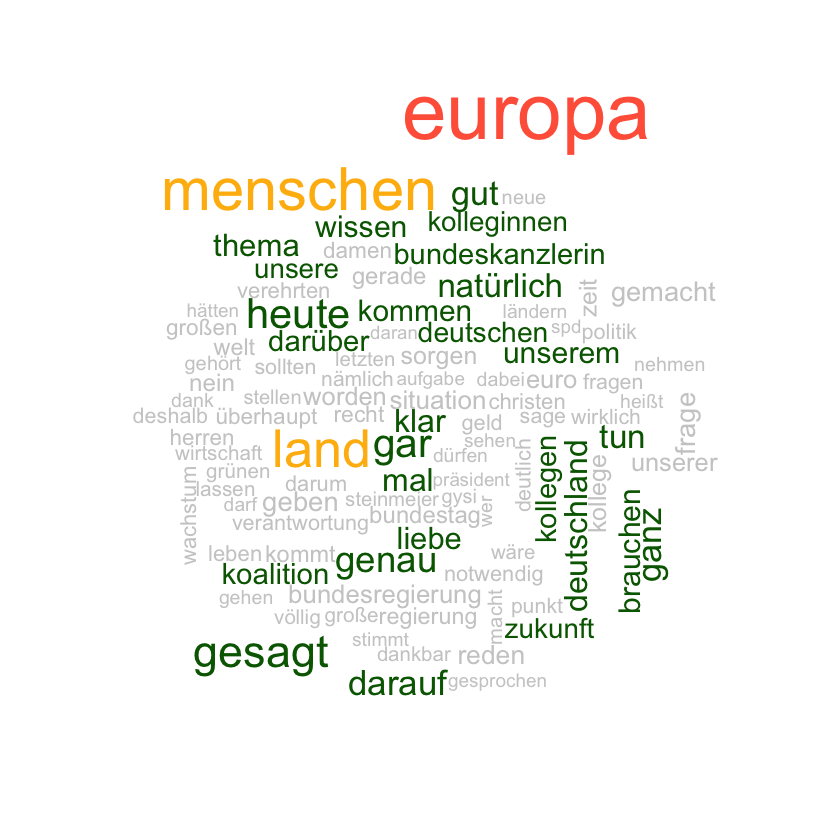

In [10]:
buildwordcloud(kauder_data$text)

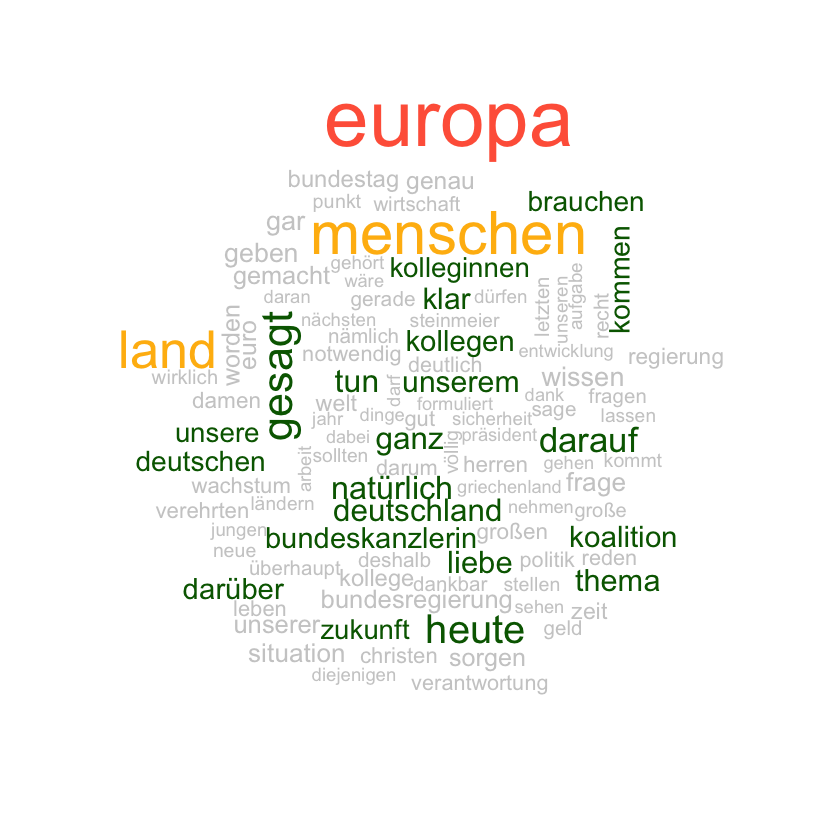

In [11]:
kauder_speech = kauder_data %>% filter(type == "speech")
buildwordcloud(kauder_speech$text)

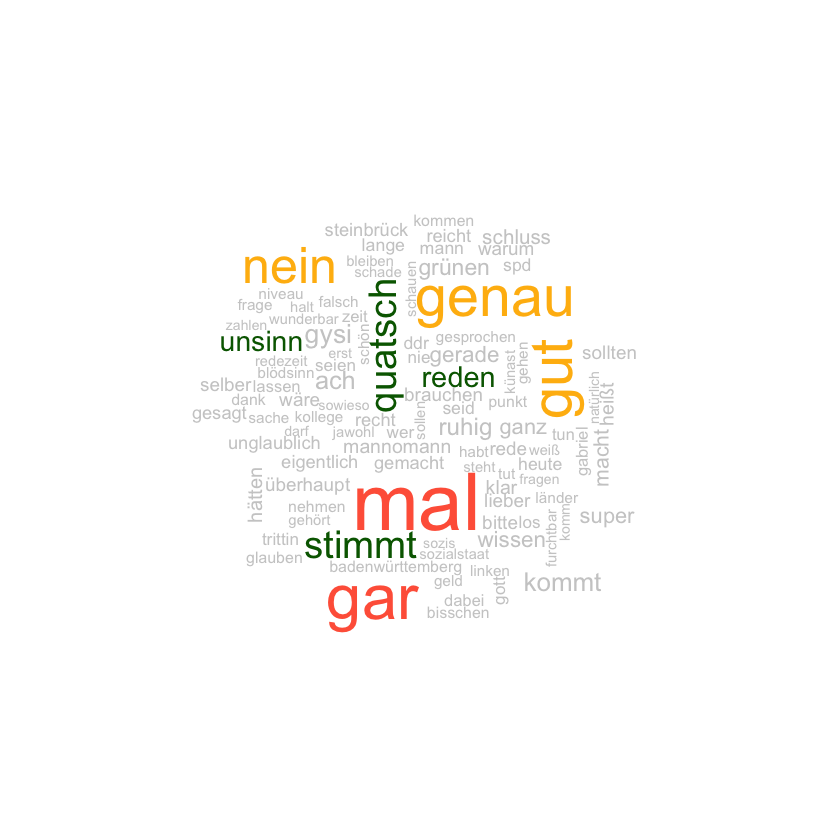

In [12]:
kauder_poi = kauder_data %>% filter(type == "poi")
buildwordcloud(kauder_poi$text)

id,sitzung,wahlperiode,in_writing,sequence,text,speaker_cleaned,speaker_fp,filename,speaker,speaker_party,type
23159,4,17,0,16,Das hat überwiegend die alte Regierung gemacht!,Thomas Oppermann,Thomas Oppermann,data/txt/17004.txt,Thomas Oppermann [SPD],spd,poi
23172,4,17,0,29,Sie können auch etwas dazu beitragen!,Thomas Oppermann,Thomas Oppermann,data/txt/17004.txt,Thomas Oppermann [SPD],spd,poi
23189,4,17,0,46,"Aber dort doch auch, oder?",Thomas Oppermann,Thomas Oppermann,data/txt/17004.txt,Thomas Oppermann [SPD],spd,poi
23427,4,17,0,284,Auf so was war ich auch eingestellt!,Thomas Oppermann,Thomas Oppermann,data/txt/17004.txt,Thomas Oppermann [SPD],spd,poi
26397,5,17,0,55,Die Börsen rufen danach! Die Finanzmärkte rufen danach!,Thomas Oppermann,Thomas Oppermann,data/txt/17005.txt,Thomas Oppermann [SPD],spd,poi
28098,7,17,0,80,Welche?,Thomas Oppermann,Thomas Oppermann,data/txt/17007.txt,Thomas Oppermann [SPD],spd,poi


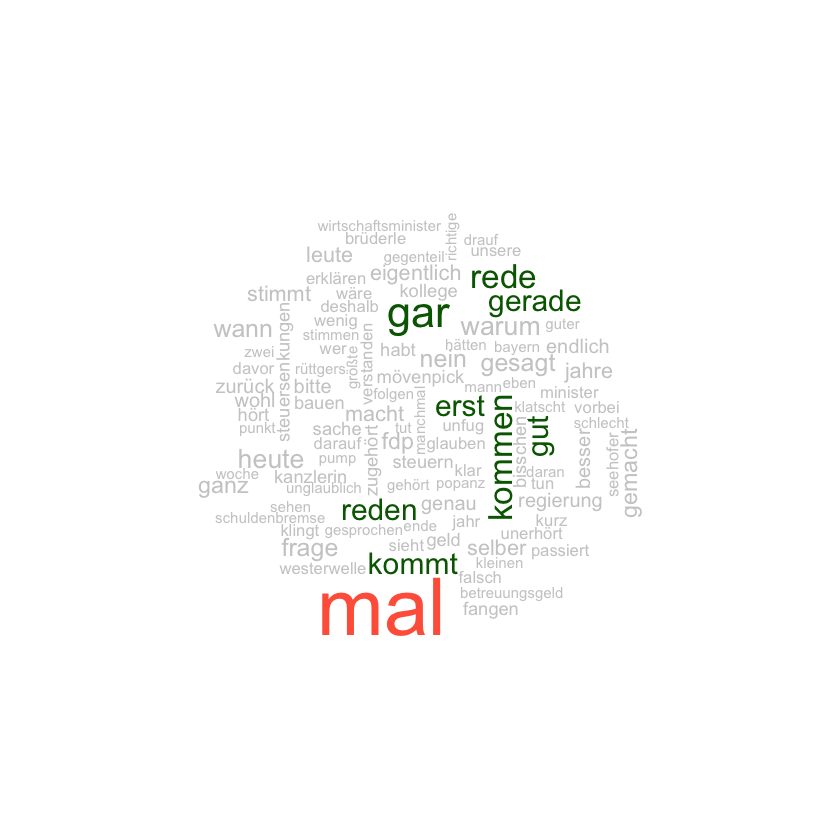

In [16]:
oppermann_data <- read.csv('../data//de_bundestag_plpr_oppermann.csv')
oppermann_poi = oppermann_data %>% filter(type == "poi")
buildwordcloud(oppermann_poi$text)
head(oppermann_poi)